# BEERS TIMELINE ANALYSIS

In [125]:
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
import src.utils.utilities_beers_analysis as utils_beers
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
from collections import Counter

# Import data

In [126]:
original_PATH = 'data/Original'
processed_PATH = 'Processed'

# Loading Data Processed
beer_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/beers_processed_dual.csv')
breweries_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/breweries_processed.csv')
users_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/users_processed.csv')
beer_RB = pd.read_csv(processed_PATH + '/RateBeer/beers_processed_dual.csv')
breweries_RB = pd.read_csv(processed_PATH + '/RateBeer/breweries_processed.csv')
users_RB = pd.read_csv(processed_PATH + '/RateBeer/users_processed.csv')
ratings_RB = pd.read_csv(processed_PATH + '/RateBeer/ratings_processed.csv')
ratings_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/ratings_processed.csv')

Ensurance of data continuity

In [127]:
print(beer_BA.columns)
print(beer_RB.columns)
print(beer_BA.columns == beer_RB.columns)

Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style', 'abv',
       'nbr_ratings', 'avg', 'Style_score', 'Overall_score',
       'nbr_matched_valid_ratings', 'location', 'location_region', 'US', 'UK',
       'Canada'],
      dtype='object')
Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style', 'abv',
       'nbr_ratings', 'avg', 'Style_score', 'Overall_score',
       'nbr_matched_valid_ratings', 'location', 'location_region', 'US', 'UK',
       'Canada'],
      dtype='object')
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


# Initial distribution analysis

In [128]:
ratings_BA.columns

Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'location_beer',
       'location_region_beer', 'US_beer', 'UK_beer', 'Canada_beer',
       'location_user', 'location_region_user', 'US_user', 'UK_user',
       'Canada_user', 'year'],
      dtype='object')

### World

In [129]:
ratings_BA_US = ratings_BA[ratings_BA['US_beer']]
ratings_BA_US_loc_year = ratings_BA_US.groupby(['year', 'location_region_user']).size().reset_index(name='num_ratings')
ratings_BA_US_loc_year = ratings_BA_US_loc_year.pivot_table(index='year', columns='location_region_user', values='num_ratings', aggfunc='sum')
ratings_BA_US_loc_year = ratings_BA_US_loc_year.fillna(0).astype(int)
ratings_BA_US_loc_year.head()


ratings_RB_US = ratings_RB[ratings_RB['US_beer']]
ratings_RB_US_loc_year = ratings_RB_US.groupby(['year', 'location_region_user']).size().reset_index(name='num_ratings')
ratings_RB_US_loc_year = ratings_RB_US_loc_year.pivot_table(index='year', columns='location_region_user', values='num_ratings', aggfunc='sum')
ratings_RB_US_loc_year = ratings_RB_US_loc_year.fillna(0).astype(int)
ratings_BA_US_loc_year.head()

location_region_user,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1996,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999,0,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000,0,0,0,0,51,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001,0,0,4,0,249,0,28,0,32,0,...,0,6,27,0,1,10,0,0,0,0


In [131]:
utils_beers.plot_US_map_data_by_year_user(ratings_BA_US_loc_year)
utils_beers.plot_US_map_data_by_year_user(ratings_RB_US_loc_year)


AttributeError: module 'src.utils.utilities_beers_analysis' has no attribute 'plot_US_map_data_by_year_user'

In [134]:
ratings_BA_loc_year = ratings_BA.groupby(['year', 'location_user']).size().reset_index(name='num_ratings')
ratings_BA_loc_year = ratings_BA_loc_year.pivot_table(index='year', columns='location_user', values='num_ratings', aggfunc='sum')
ratings_BA_loc_year = ratings_BA_loc_year.fillna(0).astype(int)  # Fill NaN with 0 and convert to int
ratings_BA_loc_year.head()
ratings_RB_loc_year = ratings_RB.groupby(['year', 'location_user']).size().reset_index(name='num_ratings')
ratings_RB_loc_year = ratings_RB_loc_year.pivot_table(index='year', columns='location_user', values='num_ratings', aggfunc='sum')
ratings_RB_loc_year = ratings_RB_loc_year.fillna(0).astype(int)  # Fill NaN with 0 and convert to int

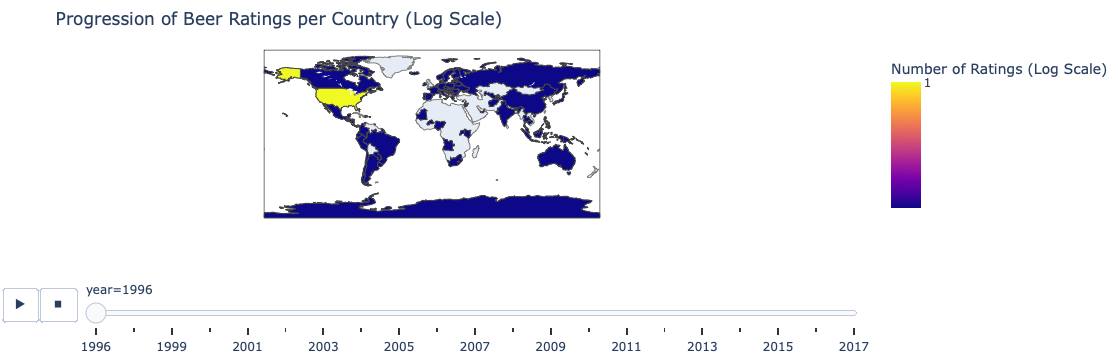

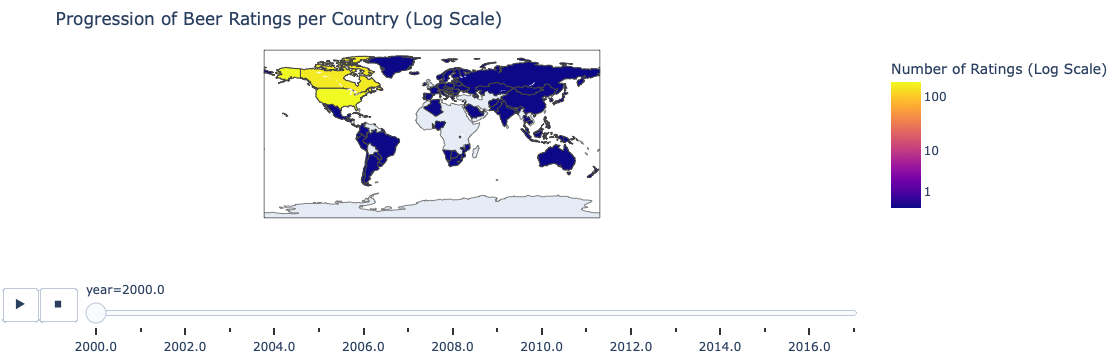

In [135]:
utils_beers.plot_world_map_data_by_year(ratings_BA_loc_year)
utils_beers.plot_world_map_data_by_year(ratings_RB_loc_year)

In [136]:

review_counts_ba = ratings_BA.groupby(['beer_id']).size().reset_index(name='review_count')
reviews_with_counts_ba = pd.merge(ratings_BA, review_counts_ba, on=['beer_id'])
filtered_reviews_ba = reviews_with_counts_ba[reviews_with_counts_ba['review_count'] >= 5]

weighted_avg_ratings_ba = filtered_reviews_ba.groupby(['beer_id', 'beer_name', 'year', 'review_count','location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')
weighted_avg_ratings_ba['rank'] = (
    weighted_avg_ratings_ba.sort_values(['year', 'location_user', 'weighted_avg_rating', 'review_count'], 
                                        ascending=[True, True, False, False])
    .groupby(['year', 'location_user'])
    .cumcount() + 1
)


# RateBeer
review_counts_RB = ratings_RB.groupby(['beer_id']).size().reset_index(name='review_count')
reviews_with_counts_rb = pd.merge(ratings_RB, review_counts_RB, on=['beer_id'])
filtered_total_rb = reviews_with_counts_rb[reviews_with_counts_rb['review_count'] >= 5]


weighted_avg_ratings_rb = filtered_total_rb.groupby(['beer_id', 'beer_name', 'year', 'review_count','location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')
weighted_avg_ratings_rb['rank'] = (
    weighted_avg_ratings_rb.sort_values(['year', 'location_user', 'weighted_avg_rating', 'review_count'], 
                                        ascending=[True, True, False, False])
    .groupby(['year', 'location_user'])
    .cumcount() + 1
)





In [137]:

top_ranked_beers_rb = weighted_avg_ratings_rb[weighted_avg_ratings_rb['rank'] == 1]

# Keep beer_id and beer_name in the result
best_beers_rb = top_ranked_beers_rb.loc[
    top_ranked_beers_rb.groupby(['year', 'location_user'])['weighted_avg_rating'].idxmax()
]

# Create the pivot to get the best average score
pivot_data_rb = best_beers_rb.pivot_table(
    values='weighted_avg_rating',  # Use weighted_avg_rating as the value
    index='year',
    columns='location_user',
    aggfunc='first'  # Take the first one, as it is already the maximum for each group
)

# Restore beer_id and beer_name
pivot_long_rb = pivot_data_rb.reset_index().melt(
    id_vars='year', 
    var_name='location_user', 
    value_name='weighted_avg_rating'
)

# Merge beer_id and beer_name
pivot_long_rb = pivot_long_rb.merge(
    best_beers_rb[['beer_id', 'beer_name', 'year', 'location_user']],
    on=['year', 'location_user'],
    how='left'
)

# Remove any NaN values in the resulting data
pivot_long_rb = pivot_long_rb.dropna(subset=['weighted_avg_rating'])

# Call the function with the transformed dataset
utils_beers.plot_world_map_data_by_weighted_avg_rating(pivot_long_rb)

AttributeError: module 'src.utils.utilities_beers_analysis' has no attribute 'plot_world_map_data_by_weighted_avg_rating'

In [ ]:
top_ranked_beers_ba = weighted_avg_ratings_ba[weighted_avg_ratings_ba['rank'] == 1]

# Keep beer_id and beer_name in the result
best_beers_ba = top_ranked_beers_ba.loc[
    top_ranked_beers_ba.groupby(['year', 'location_user'])['weighted_avg_rating'].idxmax()
]

# Create the pivot to obtain the best average score
pivot_data_ba = best_beers_ba.pivot_table(
    values='weighted_avg_rating',  # Use the weighted_avg_rating as the value
    index='year',
    columns='location_user',
    aggfunc='first'  # Take the first, since it's already the maximum for each group
)

# Reset beer_id and beer_name
pivot_long_ba = pivot_data_ba.reset_index().melt(
    id_vars='year', 
    var_name='location_user', 
    value_name='weighted_avg_rating'
)

# Associate beer_id and beer_name
pivot_long_ba = pivot_long_ba.merge(
    best_beers_ba[['beer_id', 'beer_name', 'year', 'location_user']],
    on=['year', 'location_user'],
    how='left'
)

# Remove any NaNs from the resulting data
pivot_long_ba = pivot_long_ba.dropna(subset=['weighted_avg_rating'])

# Call the function with the transformed dataset
utils_beers.plot_world_map_data_by_weighted_avg_rating(pivot_long_ba)


In [ ]:
# Filtra per Stati Uniti
ratings_BA_US = ratings_BA[ratings_BA['location_user'] == 'United States']
ratings_RB_US = ratings_RB[ratings_RB['location_user'] == 'United States']

# Calcolo per Beer Advocate
review_counts_BA_US = ratings_BA_US.groupby(['beer_id']).size().reset_index(name='review_count')
reviews_with_counts_BA_US = pd.merge(ratings_BA_US, review_counts_BA_US, on=['beer_id'])
filtered_reviews_BA_US = reviews_with_counts_BA_US[reviews_with_counts_BA_US['review_count'] >= 5]

weighted_avg_ratings_BA_US = filtered_reviews_BA_US.groupby(
    ['beer_id', 'beer_name', 'year', 'review_count', 'location_region_user']
).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

weighted_avg_ratings_BA_US['rank'] = (
    weighted_avg_ratings_BA_US.sort_values(
        ['year', 'location_region_user', 'weighted_avg_rating', 'review_count'],
        ascending=[True, True, False, False]
    )
    .groupby(['year', 'location_region_user'])
    .cumcount() + 1
)

# Calcolo per RateBeer
review_counts_RB_US = ratings_RB_US.groupby(['beer_id']).size().reset_index(name='review_count')
reviews_with_counts_RB_US = pd.merge(ratings_RB_US, review_counts_RB_US, on=['beer_id'])
filtered_reviews_RB_US = reviews_with_counts_RB_US[reviews_with_counts_RB_US['review_count'] >= 5]

weighted_avg_ratings_RB_US = filtered_reviews_RB_US.groupby(
    ['beer_id', 'beer_name', 'year', 'review_count', 'location_region_user']
).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

weighted_avg_ratings_RB_US['rank'] = (
    weighted_avg_ratings_RB_US.sort_values(
        ['year', 'location_region_user', 'weighted_avg_rating', 'review_count'],
        ascending=[True, True, False, False]
    )
    .groupby(['year', 'location_region_user'])
    .cumcount() + 1
)



In [ ]:
top_ranked_beers_RB_US= weighted_avg_ratings_RB_US[weighted_avg_ratings_RB_US['rank'] == 1]

# Mantieni beer_id e beer_name nel risultato
best_beers_RB_US= top_ranked_beers_RB_US.loc[
    top_ranked_beers_RB_US.groupby(['year', 'location_region_user'])['weighted_avg_rating'].idxmax()
]

# Creazione del pivot per ottenere lo score medio migliore
pivot_data_RB_US = best_beers_RB_US.pivot_table(
    values='weighted_avg_rating',  # Usa il weighted_avg_rating come valore
    index='year',
    columns='location_region_user',
    aggfunc='first'  # Prendi il primo, dato che è già il massimo per ogni gruppo
)

# Ripristina beer_id e beer_name
pivot_long_RB_US = pivot_data_RB_US.reset_index().melt(
    id_vars='year', 
    var_name='location_region_user', 
    value_name='weighted_avg_rating'
)

# Associa beer_id e beer_name
pivot_long_RB_US = pivot_long_RB_US.merge(
    best_beers_RB_US[['beer_id', 'beer_name', 'year', 'location_region_user']],
    on=['year', 'location_region_user'],
    how='left'
)

# Rimuovi eventuali NaN nei dati risultanti
pivot_long_RB_US = pivot_long_RB_US.dropna(subset=['weighted_avg_rating'])

# Chiama la funzione con il dataset trasformato
utils_beers.plot_US_weighted_avg_map_by_year(pivot_long_RB_US)

In [ ]:
top_ranked_beers_BA_US= weighted_avg_ratings_BA_US[weighted_avg_ratings_BA_US['rank'] == 1]

# Mantieni beer_id e beer_name nel risultato
best_beers_BA_US= top_ranked_beers_BA_US.loc[
    top_ranked_beers_BA_US.groupby(['year', 'location_region_user'])['weighted_avg_rating'].idxmax()
]

# Creazione del pivot per ottenere lo score medio migliore
pivot_data_BA_US = best_beers_BA_US.pivot_table(
    values='weighted_avg_rating',  # Usa il weighted_avg_rating come valore
    index='year',
    columns='location_region_user',
    aggfunc='first'  # Prendi il primo, dato che è già il massimo per ogni gruppo
)

# Ripristina beer_id e beer_name
pivot_long_BA_US = pivot_data_BA_US.reset_index().melt(
    id_vars='year', 
    var_name='location_region_user', 
    value_name='weighted_avg_rating'
)

# Associa beer_id e beer_name
pivot_long_BA_US = pivot_long_BA_US.merge(
    best_beers_BA_US[['beer_id', 'beer_name', 'year', 'location_region_user']],
    on=['year', 'location_region_user'],
    how='left'
)

# Rimuovi eventuali NaN nei dati risultanti
pivot_long_BA_US = pivot_long_BA_US.dropna(subset=['weighted_avg_rating'])

# Chiama la funzione con il dataset trasformato
utils_beers.plot_US_weighted_avg_map_by_year(pivot_long_BA_US)